In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360, 3)


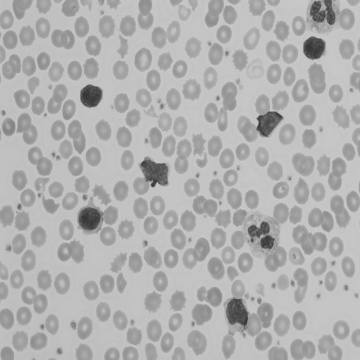

In [82]:
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')

print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [83]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 256])
plt.plot(hist)

In [84]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

In [97]:
Threshold = 180
for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
        if gimg1[h, w] > Threshold:
            gBin[h, w] = 255
        else:
            gBin[h, w] = 0

cv2_imshow(gBin)

In [98]:
T1 = 150
T2 = 0
T0 = 1

In [99]:
def Threshold_update(img, bimg):
    sum1 = 0
    count1 = 1
    sum2 = 0
    count2 = 1

    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            if(bimg[h, w] == 0):
                sum1 = np.int32(sum1 + img[h, w])
                count1 += 1
            else:
                sum2 = np.int32(sum2 + img[h, w])
                count2 += 1

    avg1 = sum1/count1
    avg2 = sum2/count2

    T = (avg1 + avg2)/2

    return T

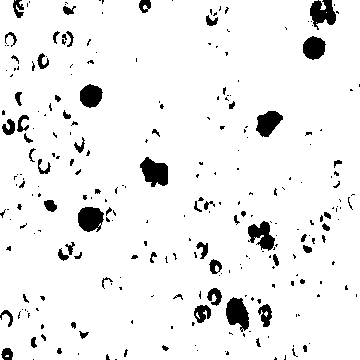

In [100]:
for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
        if gimg1[h, w] > T1:
            gBin[h, w] = 255
        else:
            gBin[h, w] = 0
cv2_imshow(gBin)

150.8596318178378
150.8596318178378


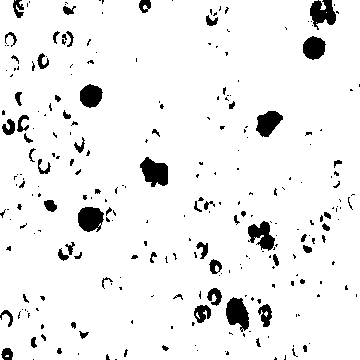

In [102]:
while True:
    T2 = Threshold_update(gimg1, gBin)
    print(T2)

    if (np.abs(T2 - T1) < T0):
        break
    else:
        T1 = T2
        for h in range(gimg1.shape[0]):
            for w in range(gimg1.shape[1]):
                if gimg1[h, w] > T1:
                    gBin[h, w] = 255
                else:
                    gBin[h, w] = 0

print(T2)
cv2_imshow(gBin)